In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

credit_df = pd.read_csv("Credit_card.csv")
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [143]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='str')

In [144]:
gender_map = {'M':0, 'F':1}
credit_df['GENDER'] = credit_df['GENDER'].map(gender_map)

car_map = {'N':0, 'Y':1}
credit_df['Car_Owner'] = credit_df['Car_Owner'].map(car_map)

property_map = {'N':0, 'Y':1}
credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map(property_map)

income_map = {'Commercial associate':0, 'Pensioner':1, 'State servant':2, 'Working':3}
credit_df['Type_Income'] = credit_df['Type_Income'].map(income_map)

education_map = {'Academic degree':0, 'Higher educaton':1, 'Incomplete higher':2, 
                 'Lower secondary':3, 'Secondary / secondary special':4}
credit_df['EDUCATION'] = credit_df['EDUCATION'].map(education_map)

married_map = {'Civil marriage':0, 'Married':1, 'Separated':2, 'Single / not married':3, 'Widow':4}
credit_df['Marital_status'] = credit_df['Marital_status'].map(married_map)

housing_map = {'Co-op apartment':0, 'House / apartment':1, 'Municipal apartment':2, 
               'Office apartment':3, 'Rented apartment':4, 'With parents':5}
credit_df['Housing_type'] = credit_df['Housing_type'].map(housing_map)

occupation_map = {'Accountants':0, 'Cleaning staff':1, 'Cooking staff':2, 
                  'Core staff':3, 'Drivers':4, 'HR staff':5, 'High skill tech staff':6, 
                  'IT staff':7, 'Laborers':8, 'Low-skill laborers':9, 'Managers':10, 
                  'Medicine staff':11, 'Private service staff':12, 'Realty agents':13,
                  'Sales staff':14, 'Secretaries':15, 'Security staff':16, 
                  'Waiters/barmen staff':17}
credit_df['Type_Occupation'] = credit_df['Type_Occupation'].map(occupation_map)

credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,0.0,1,1,0,180000.0,1,NaN,1,1,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,1.0,1,0,0,315000.0,0,NaN,1,1,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,1.0,1,0,0,315000.0,0,NaN,1,1,NaN,-586,1,1,1,0,NaN,2
3,5009749,1.0,1,0,0,NaN,0,NaN,1,1,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,1.0,1,0,0,315000.0,0,NaN,1,1,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1.0,0,1,0,NaN,0,NaN,1,1,-11957.0,-2182,1,0,0,0,10.0,2
1544,5023655,1.0,0,0,0,225000.0,0,2.0,3,1,-10229.0,-1209,1,0,0,0,0.0,1
1545,5115992,0.0,1,1,2,180000.0,3,NaN,1,1,-13174.0,-2477,1,0,0,0,10.0,4
1546,5118219,0.0,1,0,0,270000.0,3,4.0,0,1,-15292.0,-645,1,1,1,0,4.0,2


In [145]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [146]:
credit_df = credit_df[['Type_Income','Propert_Owner']]

X = np.array(credit_df['Type_Income']).reshape(-1,1)

y = np.array(credit_df['Propert_Owner']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [147]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [148]:
y_pred = regression_model.predict(X_test)
y_pred

array([[0.62613627],
       [0.67292885],
       [0.62613627],
       [0.67292885],
       [0.62613627],
       [0.62613627],
       [0.64953256],
       [0.67292885],
       [0.69632514],
       [0.62613627],
       [0.62613627],
       [0.62613627],
       [0.67292885],
       [0.69632514],
       [0.62613627],
       [0.69632514],
       [0.62613627],
       [0.67292885],
       [0.62613627],
       [0.62613627],
       [0.69632514],
       [0.62613627],
       [0.69632514],
       [0.62613627],
       [0.69632514],
       [0.69632514],
       [0.67292885],
       [0.69632514],
       [0.62613627],
       [0.67292885],
       [0.69632514],
       [0.67292885],
       [0.69632514],
       [0.69632514],
       [0.62613627],
       [0.64953256],
       [0.62613627],
       [0.62613627],
       [0.62613627],
       [0.69632514],
       [0.62613627],
       [0.62613627],
       [0.62613627],
       [0.62613627],
       [0.69632514],
       [0.62613627],
       [0.62613627],
       [0.696

In [149]:
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.0018636184071153528


Linear Regression performed terribly for this problem. It is not a good approach for this dataset. 

In [150]:
X = credit_df.drop('Propert_Owner', axis=1)
y = credit_df['Propert_Owner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 50)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0]
<class 'numpy.ndarray'>


In [151]:
print(knn.score(X_test, y_test))

0.44086021505376344


KNN was much better at predicting than LinReg was. This could be a decent approach to this dataset. 

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 42, stratify=y)

In [153]:
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = regression.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [154]:
regression.score(X_test, y_test)

0.6516129032258065

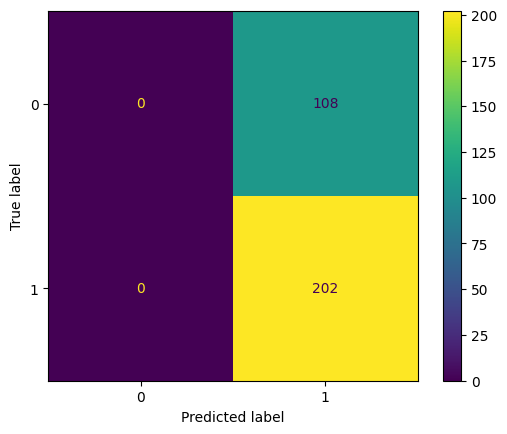

In [155]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [156]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                            fp:int, fn: int) -> float:
    if calc_type == "precision":
        value = tp/(tp + fp)
        return value
    
    elif calc_type == "recall":
        value = tp/(tp + fn)
        return value
    
    else: 
        error_msg = "ERROR"
        return error_msg

In [157]:
precision_and_recall("precision", 202, 0, 108, 0)

0.6516129032258065

Overall, LogReg seems to be the best fit for this dataset. 

I didn't notice much happening when I standardized the data. Accuracy is probably the best measure of performance, since it tells you how close to the true answer your prediciton is. 